# Data Mining

## ASSIGNMENT TASKS
### Continue practicing exploratory data analysis and visualization 

**DATA**

[OpenPowerLifting.org](https://openpowerlifting.org) is a large set of data for a multitude of data related to powerlifting competitions around the world. The core data live at the following open source repository on [gitlab.com/openpowerlifting/opl-data](https://gitlab.com/openpowerlifting/opl-data).

&#167;  **BUILD THE DATASET**

**Load all the 2019 datasets into a single Pandas DataFrame**.

Your DataFrame should have around 21K rows.

In [1]:
# importing a modules
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_list_2019 = glob.glob("./data/**/19*/entries.csv")
df = pd.concat((pd.read_csv(file) for file in file_list_2019),ignore_index=True)


In [3]:
print(df)

                             Name   BirthDate                 Team Sex   Age  \
0                María José López  1982-05-30  Powerlifting Chiloé   F  37.0   
1           Karina Garcés Herrera  1993-07-24          Powermenace   F  25.0   
2                   Texia Cárcamo  1991-01-09  Powerlifting Chiloé   F  28.0   
3      Maryorie Flores Valenzuela  1995-12-01              Warlike   F  23.0   
4                  Yasmín Berrios  1992-01-14  Powerlifting Chiloé   F  27.0   
...                           ...         ...                  ...  ..   ...   
21221               Ardo Lilleorg         NaN           Team Corsa   M   NaN   
21222           Donatas Daučiūnas         NaN           Power Team   M   NaN   
21223               Mareks Leitis         NaN           Individual   M   NaN   
21224              Raiko Borissov         NaN           Team Corsa   M   NaN   
21225          Vaidas Zdanavičius         NaN        Individualiai   M   NaN   

      Division Event Equipment  Bodywei

In [4]:
df.head()

,Name,BirthDate,Team,Sex,Age,Division,Event,Equipment,BodyweightKg,WeightClassKg,...,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Tested,State,Country,BirthYear,CyrillicName,ChineseName
0,María José López,1982-05-30,Powerlifting Chiloé,F,37.0,Open,SBD,Wraps,43.3,44,...,NaN,105.0,232.5,1,NaN,NaN,NaN,NaN,NaN,NaN
1,Karina Garcés Herrera,1993-07-24,Powermenace,F,25.0,Open,SBD,Wraps,47.4,48,...,NaN,135.0,307.5,1,NaN,NaN,NaN,NaN,NaN,NaN
2,Texia Cárcamo,1991-01-09,Powerlifting Chiloé,F,28.0,Open,SBD,Wraps,50.7,52,...,NaN,100.0,215.0,2,NaN,NaN,NaN,NaN,NaN,NaN
3,Maryorie Flores Valenzuela,1995-12-01,Warlike,F,23.0,Open,SBD,Wraps,51.9,52,...,NaN,147.5,315.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,Yasmín Berrios,1992-01-14,Powerlifting Chiloé,F,27.0,Open,SBD,Wraps,57.7,60,...,NaN,125.0,292.5,3,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Name', 'BirthDate', 'Team', 'Sex', 'Age', 'Division', 'Event',
       'Equipment', 'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg',
       'Squat3Kg', 'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg',
       'Bench3Kg', 'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg',
       'Deadlift3Kg', 'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place',
       'Tested', 'State', 'Country', 'BirthYear', 'CyrillicName',
       'ChineseName'],
      dtype='object')

In [6]:
print("length:",len(df))

length: 21226


&#167;  **FILTER AND EXPLORE THE DATA**


We'll perform a few exploratory exercises to get a feel for the data.

Answer the following questions in your notebook:

1. What are the densities (counts) of participants in the top 5 `Division`s?



In [7]:
df['Division'].value_counts()

Girls           6319
Open            2821
Pro Open        1351
Class 1A         633
M-O              609
                ... 
Masters 40+        1
M-M2-R-IPO         1
MEM5               1
F_MES_4_AWPC       1
FM-SP              1
Name: Division, Length: 400, dtype: int64

2. How many `M` and `F` sex values are in the dataset?

In [8]:
male = df[df['Sex']=='M']
female = df[df['Sex']=='F']
print("Male count :",len(male))
print("Female Count:",len(female))

Male count : 10541
Female Count: 10685


3. After dropping `NaN` values, what are the top 5 countries in the data, by number of datapoints?

In [9]:
country = df.drop(labels = ['Country'], axis = 1)
print(country)

                             Name   BirthDate                 Team Sex   Age  \
0                María José López  1982-05-30  Powerlifting Chiloé   F  37.0   
1           Karina Garcés Herrera  1993-07-24          Powermenace   F  25.0   
2                   Texia Cárcamo  1991-01-09  Powerlifting Chiloé   F  28.0   
3      Maryorie Flores Valenzuela  1995-12-01              Warlike   F  23.0   
4                  Yasmín Berrios  1992-01-14  Powerlifting Chiloé   F  27.0   
...                           ...         ...                  ...  ..   ...   
21221               Ardo Lilleorg         NaN           Team Corsa   M   NaN   
21222           Donatas Daučiūnas         NaN           Power Team   M   NaN   
21223               Mareks Leitis         NaN           Individual   M   NaN   
21224              Raiko Borissov         NaN           Team Corsa   M   NaN   
21225          Vaidas Zdanavičius         NaN        Individualiai   M   NaN   

      Division Event Equipment  Bodywei

In [10]:
df['Country'].value_counts()

Ukraine              1656
Russia                669
Ireland               564
UK                    551
USA                   415
France                250
Germany               235
Finland               172
Italy                 164
Poland                131
Norway                130
Sweden                112
Czechia                93
India                  89
Hungary                70
Belarus                69
Netherlands            57
Slovakia               55
South Africa           53
Lithuania              48
Denmark                46
Uganda                 45
Austria                42
Spain                  40
Belgium                39
Estonia                37
Iceland                30
Romania                26
Bulgaria               22
Switzerland            22
Iran                   17
Kyrgyzstan             17
Armenia                17
Georgia                16
Latvia                 14
Malta                  11
Saudi Arabia            9
Luxembourg              7
Cuba        

4. For the country of _Belarus_, how many participants are there in this data?

In [11]:
df[df['Country'] == 'Belarus']

,Name,BirthDate,Team,Sex,Age,Division,Event,Equipment,BodyweightKg,WeightClassKg,...,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Tested,State,Country,BirthYear,CyrillicName,ChineseName
949,Dmitriy Eyvazov,1983-05-19,NaN,M,36.0,Submasters 33-39,B,Raw,92.60,100,...,NaN,NaN,180.0,1,No,NaN,Belarus,NaN,NaN,NaN
2125,Alexander Moiseev,NaN,NaN,M,NaN,Masters 3,SBD,Raw,58.10,59,...,NaN,145.0,345.0,1,NaN,NaN,Belarus,1954.0,NaN,NaN
2192,Anton Rusakou,NaN,NaN,M,NaN,Open,B,Raw,75.63,83,...,NaN,NaN,157.5,3,NaN,NaN,Belarus,1994.0,NaN,NaN
2194,Aleh Yermak,NaN,NaN,M,NaN,Open,B,Raw,92.12,93,...,NaN,NaN,215.0,1,NaN,NaN,Belarus,1989.0,NaN,NaN
2199,Aliaksandr Dziamyanau,NaN,NaN,M,NaN,Open,B,Raw,111.33,120,...,NaN,NaN,225.0,1,NaN,NaN,Belarus,1986.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15888,Evgen Luk'Yanov,1980-08-11,NaN,M,NaN,Open,D,Raw,86.35,90,...,NaN,240.0,240.0,2,No,NaN,Belarus,1980.0,Євген Лук'Янов,NaN
15903,Volodimir Lukyanov,1966-02-18,NaN,M,NaN,Masters 50-59,D,Raw,100.00,100,...,NaN,260.0,260.0,1,No,NaN,Belarus,1966.0,Володимир Лук'янов,NaN
15905,Igor Furmanov,1968-04-24,NaN,M,NaN,Masters 50-59,D,Raw,112.05,125,...,NaN,220.0,220.0,1,No,NaN,Belarus,1968.0,Ігор Фурманов,NaN
15907,Olena Shemetova,1982-11-07,NaN,F,NaN,Open,D,Raw,60.00,60,...,NaN,130.0,130.0,2,No,NaN,Belarus,1982.0,Олена Шеметова,NaN


5. Out all the data, how much of it is missing all of `Age`, `BirthYear` and `BirthDate`?  Give both the raw number and the percentage.

In [12]:
df['Date'] = pd.to_datetime(df['BirthDate'])
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Year'] = df['Date'].apply(lambda x:x.year)

In [13]:
df_missing = df.isna()

In [14]:
df_missing / len(df)

,Name,BirthDate,Team,Sex,Age,Division,Event,Equipment,BodyweightKg,WeightClassKg,...,Place,Tested,State,Country,BirthYear,CyrillicName,ChineseName,Date,Month,Year
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000000,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000000,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000000,0.000000,0.000000
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21221,0.0,0.000047,0.0,0.0,0.000047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047
21222,0.0,0.000047,0.0,0.0,0.000047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047
21223,0.0,0.000047,0.0,0.0,0.000047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047
21224,0.0,0.000047,0.0,0.0,0.000047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047


In [15]:
(df_missing.mean())*100

Name                0.000000
BirthDate          73.881089
Team               58.145670
Sex                 0.000000
Age                70.201639
Division            0.000000
Event               0.000000
Equipment           0.000000
BodyweightKg        1.083577
WeightClassKg       1.102422
Squat1Kg           71.850561
Squat2Kg           72.067276
Squat3Kg           72.943560
Squat4Kg           99.613681
Best3SquatKg       41.175916
Bench1Kg           48.619617
Bench2Kg           49.260341
Bench3Kg           51.125978
Bench4Kg           99.217940
Best3BenchKg       16.178272
Deadlift1Kg        62.070103
Deadlift2Kg        62.588335
Deadlift3Kg        64.708377
Deadlift4Kg        99.038915
Best3DeadliftKg    32.069160
TotalKg             6.581551
Place               0.000000
Tested             70.220484
State              96.169792
Country            71.242815
BirthYear          82.827664
CyrillicName       77.452181
ChineseName        99.830397
Date               73.881089
Month         

&#167;  **CLEAN THE DATA**

From the previous section, you learned that a good percentage of the data is lacking age
information.  You also learned that between `Age`, `BirthDate`, and `BirthYear`, there
are quite a few gaps, but that the age coverage could be increased if we took the time
to do so. 

We are going to fill in those gaps the easy way -- by making sure that `Age` has the data
it needs as we are going to do analysis over that in the subsequent parts of the 
assignment (and it is one of the fields we can actually do something about).

In this part, you will write a function and use the `apply()` method in Pandas
to fill in the missing data.

You will need to:

* find all data missing `Age`, but has at least `BirthYear` and `BirthDate`.
* calculate age by either subtracting `BirthYear` from 2019 **or** by subtracting the 
  year part from `BirthDate`.
* in your final DataFrame, make sure Age is an `int` type.
* show all the steps in your notebook to get full credit.

After doing that answer the following questions:

1. How many new datapoints did you add to the dataset after filling in the missing Age values?

In [16]:
df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,BirthYear,Month,Year
count,6325.000000,20996.000000,5975.000000,5929.000000,5743.000000,82.000000,12486.000000,10906.000000,10770.000000,10374.000000,...,17792.000000,8051.000000,7941.000000,7491.000000,204.00000,14419.000000,19829.000000,3645.000000,5544.000000,5544.000000
mean,33.821502,79.055764,115.074202,96.682795,40.355137,49.855749,138.412704,85.294591,60.057810,-12.741799,...,97.068300,155.425552,130.433495,15.655005,48.64377,159.403087,284.711823,1984.595336,6.472944,1987.156746
std,12.989520,22.806553,136.708765,162.020129,190.349579,168.000019,66.706216,97.275901,122.077479,139.131855,...,57.231092,111.498115,155.721794,209.098965,181.95075,67.318089,178.516556,14.860439,3.352735,11.913111
min,5.000000,18.000000,-410.000000,-455.000000,-430.000000,-285.000000,-205.000000,-420.000000,-420.000000,-405.000000,...,-260.000000,-360.000000,-385.000000,-400.500000,-340.00000,-230.000000,20.410000,1938.000000,1.000000,1933.000000
25%,24.000000,60.892500,87.500000,75.000000,-150.000000,-103.625000,90.000000,56.700000,35.000000,-130.000000,...,49.900000,120.000000,115.000000,-200.000000,-148.12500,104.330000,160.000000,1975.000000,4.000000,1980.000000
50%,32.000000,75.000000,142.500000,140.000000,115.000000,117.500000,117.930000,100.000000,95.000000,-55.000000,...,80.000000,172.500000,170.000000,115.000000,130.00000,140.000000,238.140000,1988.000000,6.000000,1989.000000
75%,41.000000,92.600000,200.000000,200.000000,190.000000,168.750000,175.000000,145.000000,142.880000,115.000000,...,137.500000,220.000000,226.798500,200.000000,174.72250,210.000000,353.800000,1997.000000,9.000000,1996.000000
max,90.000000,205.050000,440.000000,440.000000,455.000000,318.000000,455.000000,400.000000,390.000000,420.000000,...,420.000000,375.000000,390.500000,397.500000,326.59000,397.500000,1130.000000,2012.000000,12.000000,2012.000000


In [17]:
print(df.isnull().sum())

Name                   0
BirthDate          15682
Team               12342
Sex                    0
Age                14901
Division               0
Event                  0
Equipment              0
BodyweightKg         230
WeightClassKg        234
Squat1Kg           15251
Squat2Kg           15297
Squat3Kg           15483
Squat4Kg           21144
Best3SquatKg        8740
Bench1Kg           10320
Bench2Kg           10456
Bench3Kg           10852
Bench4Kg           21060
Best3BenchKg        3434
Deadlift1Kg        13175
Deadlift2Kg        13285
Deadlift3Kg        13735
Deadlift4Kg        21022
Best3DeadliftKg     6807
TotalKg             1397
Place                  0
Tested             14905
State              20413
Country            15122
BirthYear          17581
CyrillicName       16440
ChineseName        21190
Date               15682
Month              15682
Year               15682
dtype: int64


In [18]:
print("Age:",df["Age"].isnull().sum())
print("BirthYear:",df["BirthYear"].isnull().sum())
print("BirthDate:",df["BirthDate"].isnull().sum())

Age: 14901
BirthYear: 17581
BirthDate: 15682


In [19]:
# calculate age by either subtracting BirthYear from 2019
age = (df["Age"]-2019)

In [20]:
k=0
for f in df:
    df['Age']= age[k]
print("Updated Age values :",df['Age'])
print("Missing age values acount : ",len(df['Age']))

Updated Age values : 0       -1982.0
1       -1982.0
2       -1982.0
3       -1982.0
4       -1982.0
          ...  
21221   -1982.0
21222   -1982.0
21223   -1982.0
21224   -1982.0
21225   -1982.0
Name: Age, Length: 21226, dtype: float64
Missing age values acount :  21226


&#167;  **GROUP THE DATA**

Pandas provides superior capabilities to slice and group data.  We would like
to build answer some questions of the 2019 data.

You will need to study the following resources to complete the questions in this section:

*  [`Dataframe.query()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html#pandas.DataFrame.query)
*  [`DataFrame.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby).  A useful hint when using this function is that you can pass to the first parameter of `DataFrame.groupby()` the list of the grouping in order of grouping, outer group first.  Thus, `groupby(['Sex', 'Division`]) will return the MultiIndex DataFrame with `Sex` as the outermost group
and `Division` the inner group. 

**NOTE**: you will use the filtered data from the previous section -- you do not want to include the missing
`Age` data in your analysis

Answer the following question for full credit on this part:

1. How many `M` sex participants are there in the `Open Pro` Division?

In [21]:
df[df['Sex']=='M']

,Name,BirthDate,Team,Sex,Age,Division,Event,Equipment,BodyweightKg,WeightClassKg,...,Place,Tested,State,Country,BirthYear,CyrillicName,ChineseName,Date,Month,Year
15,Cristian Mateluna Nuñez,1986-07-14,Warlike,M,-1982.0,Open,SBD,Wraps,55.30,56,...,1,NaN,NaN,NaN,NaN,NaN,NaN,1986-07-14,7.0,1986.0
16,Paul Salas Ortega,2001-10-15,Liceo Manuel Montt,M,-1982.0,Open,SBD,Wraps,56.00,56,...,2,NaN,NaN,NaN,NaN,NaN,NaN,2001-10-15,10.0,2001.0
17,Rodrigo Bolivar Villalobos,1989-05-18,Agoge Lifting,M,-1982.0,Open,SBD,Wraps,58.50,60,...,1,NaN,NaN,NaN,NaN,NaN,NaN,1989-05-18,5.0,1989.0
18,Diego Vásquez Rodríguez,2002-03-13,NaN,M,-1982.0,Open,SBD,Wraps,59.60,60,...,2,NaN,NaN,NaN,NaN,NaN,NaN,2002-03-13,3.0,2002.0
19,Adolfo Pacheco Tolosa,2001-11-08,Liceo Manuel Montt,M,-1982.0,Open,SBD,Wraps,57.60,60,...,3,NaN,NaN,NaN,NaN,NaN,NaN,2001-11-08,11.0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21221,Ardo Lilleorg,NaN,Team Corsa,M,-1982.0,Open,B,Raw,108.55,110,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
21222,Donatas Daučiūnas,NaN,Power Team,M,-1982.0,Open,B,Raw,122.50,125,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
21223,Mareks Leitis,NaN,Individual,M,-1982.0,Open,B,Raw,141.00,140+,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
21224,Raiko Borissov,NaN,Team Corsa,M,-1982.0,Open,B,Raw,131.50,140,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [22]:
df.query('Sex == "M" and Division == "Pro Open"').count()

Name               1078
BirthDate          1040
Team                 73
Sex                1078
Age                1078
Division           1078
Event              1078
Equipment          1078
BodyweightKg       1078
WeightClassKg      1078
Squat1Kg            241
Squat2Kg            238
Squat3Kg            231
Squat4Kg              0
Best3SquatKg        225
Bench1Kg            854
Bench2Kg            836
Bench3Kg            802
Bench4Kg              2
Best3BenchKg        794
Deadlift1Kg         449
Deadlift2Kg         431
Deadlift3Kg         389
Deadlift4Kg           0
Best3DeadliftKg     427
TotalKg            1000
Place              1078
Tested             1076
State                 0
Country             160
BirthYear            37
CyrillicName        836
ChineseName           0
Date               1040
Month              1040
Year               1040
dtype: int64

2. What is the median age of all participants in the `Open` Division?

In [24]:
df.query('Division == "Open"').median()

<ipython-input-24-6a65b32dcb12>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.query('Division == "Open"').median()


Age               -1982.000
BodyweightKg         82.265
Squat1Kg            160.000
Squat2Kg            160.000
Squat3Kg            127.500
Squat4Kg            102.500
Best3SquatKg        190.000
Bench1Kg            115.000
Bench2Kg            105.000
Bench3Kg            -61.230
Bench4Kg           -125.885
Best3BenchKg        133.810
Deadlift1Kg         190.000
Deadlift2Kg         185.000
Deadlift3Kg          92.500
Deadlift4Kg         147.420
Best3DeadliftKg     215.000
TotalKg             305.000
BirthYear          1989.000
Month                 6.000
Year               1989.000
dtype: float64

3. What is the mean `BodyweightKg` in the `Open` Division men (`M`)?  

In [25]:
df.query('Sex == "M" and Division == "Open"').mean()

<ipython-input-25-f4760fdec277>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.query('Sex == "M" and Division == "Open"').mean()


Age               -1982.000000
BodyweightKg         94.603567
Squat1Kg            153.127326
Squat2Kg            128.875381
Squat3Kg             49.485841
Squat4Kg             50.201111
Best3SquatKg        233.621669
Bench1Kg            112.550341
Bench2Kg             77.375341
Bench3Kg            -20.208563
Bench4Kg           -114.304000
Best3BenchKg        162.406429
Deadlift1Kg         201.493115
Deadlift2Kg         154.015059
Deadlift3Kg         -28.355321
Deadlift4Kg          96.860000
Best3DeadliftKg     246.066878
TotalKg             418.909001
BirthYear          1988.008838
Month                 6.605351
Year               1987.994426
dtype: float64

4. How does this compare with `Open` Division women (`F`)?

In [26]:
df.query('Sex == "F" and Division == "Open"').mean()

<ipython-input-26-363eeb469ab2>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.query('Sex == "F" and Division == "Open"').mean()


Age               -1982.000000
BodyweightKg         67.526649
Squat1Kg             82.820156
Squat2Kg             68.558591
Squat3Kg             35.485607
Squat4Kg              2.937500
Best3SquatKg        135.097053
Bench1Kg             57.909114
Bench2Kg             41.442936
Bench3Kg             -7.403815
Bench4Kg            -46.090000
Best3BenchKg         79.745238
Deadlift1Kg         122.089530
Deadlift2Kg          92.508219
Deadlift3Kg          18.733248
Deadlift4Kg          52.844617
Best3DeadliftKg     146.483823
TotalKg             260.046003
BirthYear          1987.902439
Month                 5.821317
Year               1986.159875
dtype: float64

In [27]:
#F are little less with value = 67.52

5. What is the correlation coefficient (Pearsons $r$ is fine) between `Best3BenchKg`?  Would you consider
   this to be a positive, negative or no correlation?

In [28]:
df.corr()['Bench3Kg']

Age                     NaN
BodyweightKg      -0.002337
Squat1Kg           0.058855
Squat2Kg           0.085906
Squat3Kg           0.108230
Squat4Kg           0.165327
Best3SquatKg       0.030611
Bench1Kg           0.022969
Bench2Kg           0.144506
Bench3Kg           1.000000
Bench4Kg          -0.027760
Best3BenchKg       0.038572
Deadlift1Kg        0.037289
Deadlift2Kg        0.081814
Deadlift3Kg        0.094941
Deadlift4Kg        0.265026
Best3DeadliftKg    0.049725
TotalKg            0.056413
BirthYear          0.047059
Month              0.014500
Year               0.005194
Name: Bench3Kg, dtype: float64

&#167;  **VISUALIZE**

In [29]:
data=df

In [30]:
df

,Name,BirthDate,Team,Sex,Age,Division,Event,Equipment,BodyweightKg,WeightClassKg,...,Place,Tested,State,Country,BirthYear,CyrillicName,ChineseName,Date,Month,Year
0,María José López,1982-05-30,Powerlifting Chiloé,F,-1982.0,Open,SBD,Wraps,43.30,44,...,1,NaN,NaN,NaN,NaN,NaN,NaN,1982-05-30,5.0,1982.0
1,Karina Garcés Herrera,1993-07-24,Powermenace,F,-1982.0,Open,SBD,Wraps,47.40,48,...,1,NaN,NaN,NaN,NaN,NaN,NaN,1993-07-24,7.0,1993.0
2,Texia Cárcamo,1991-01-09,Powerlifting Chiloé,F,-1982.0,Open,SBD,Wraps,50.70,52,...,2,NaN,NaN,NaN,NaN,NaN,NaN,1991-01-09,1.0,1991.0
3,Maryorie Flores Valenzuela,1995-12-01,Warlike,F,-1982.0,Open,SBD,Wraps,51.90,52,...,1,NaN,NaN,NaN,NaN,NaN,NaN,1995-12-01,12.0,1995.0
4,Yasmín Berrios,1992-01-14,Powerlifting Chiloé,F,-1982.0,Open,SBD,Wraps,57.70,60,...,3,NaN,NaN,NaN,NaN,NaN,NaN,1992-01-14,1.0,1992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21221,Ardo Lilleorg,NaN,Team Corsa,M,-1982.0,Open,B,Raw,108.55,110,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
21222,Donatas Daučiūnas,NaN,Power Team,M,-1982.0,Open,B,Raw,122.50,125,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
21223,Mareks Leitis,NaN,Individual,M,-1982.0,Open,B,Raw,141.00,140+,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
21224,Raiko Borissov,NaN,Team Corsa,M,-1982.0,Open,B,Raw,131.50,140,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_dataset=df.copy()
df_dataset.Sex=le.fit_transform(df.Sex) # the Gender is encoded as 0/1 where 0 is female and 1 is male.
df_dataset.head()

,Name,BirthDate,Team,Sex,Age,Division,Event,Equipment,BodyweightKg,WeightClassKg,...,Place,Tested,State,Country,BirthYear,CyrillicName,ChineseName,Date,Month,Year
0,María José López,1982-05-30,Powerlifting Chiloé,0,-1982.0,Open,SBD,Wraps,43.3,44,...,1,NaN,NaN,NaN,NaN,NaN,NaN,1982-05-30,5.0,1982.0
1,Karina Garcés Herrera,1993-07-24,Powermenace,0,-1982.0,Open,SBD,Wraps,47.4,48,...,1,NaN,NaN,NaN,NaN,NaN,NaN,1993-07-24,7.0,1993.0
2,Texia Cárcamo,1991-01-09,Powerlifting Chiloé,0,-1982.0,Open,SBD,Wraps,50.7,52,...,2,NaN,NaN,NaN,NaN,NaN,NaN,1991-01-09,1.0,1991.0
3,Maryorie Flores Valenzuela,1995-12-01,Warlike,0,-1982.0,Open,SBD,Wraps,51.9,52,...,1,NaN,NaN,NaN,NaN,NaN,NaN,1995-12-01,12.0,1995.0
4,Yasmín Berrios,1992-01-14,Powerlifting Chiloé,0,-1982.0,Open,SBD,Wraps,57.7,60,...,3,NaN,NaN,NaN,NaN,NaN,NaN,1992-01-14,1.0,1992.0


In [32]:
df_dataset["Sex"]

0        0
1        0
2        0
3        0
4        0
        ..
21221    1
21222    1
21223    1
21224    1
21225    1
Name: Sex, Length: 21226, dtype: int32

import coefficient

for i, d in enumerate(df_dataset):
    if d=="Sex":
        if df_dataset['Sex']:
            print()

You must answer the following question directly in your notebook:

1. What's the general trend you see in the area plots?  Your answer can
   be in one or two sentences.

plot, we can see a generally tight positive correlation between a tree

### (50%) Perform a clustering analysis using k-means 

**REMEMBER TO MAKE SURE TO SHOW ALL YOUR WORK IN THE NOTEBOOK SO YOU CAN RECEIVE PARTIAL CREDIT WHERE APPROPRIATE!**

&#167;  **PREPARE FOR CLUSTERING**

In [33]:
file_list_2019 = glob.glob("./data/**/19*/entries.csv")
database = pd.concat((pd.read_csv(file) for file in file_list_2019),ignore_index=True)

You will need to complete part 1 of this homework to filter the data to the necessary
subset for this part.  The subset of features will just
be the following:

  ```python
  features = [
      'Sex',
      'Age',
      'BodyweightKg',
      'Best3SquatKg',
      'Best3BenchKg',
      'Best3DeadliftKg',
      'TotalKg'
    ]
  ```

In your notebook, you should show:

* clearly how many features are now in your dataframe?
* that you are using the **cleaned** data on `Age`
* you should also remove any rows where `NaN` is in any of required columns (hint: `dropna()`)

In [34]:
features = [
      'Sex',
      'Age',
      'BodyweightKg',
      'Best3SquatKg',
      'Best3BenchKg',
      'Best3DeadliftKg',
      'TotalKg'
    ]

In [35]:
df['Sex']

0        F
1        F
2        F
3        F
4        F
        ..
21221    M
21222    M
21223    M
21224    M
21225    M
Name: Sex, Length: 21226, dtype: object

In [36]:
print("clearly how many features are now in your dataframe?:",len(features))

clearly how many features are now in your dataframe?: 7


In [37]:
pd.get_dummies(df)

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,ChineseName_苏丹,ChineseName_蔡宗倍,ChineseName_袁世锟,ChineseName_袁增辉,ChineseName_谭添乐,ChineseName_郑海涛,ChineseName_陆锦汉,ChineseName_陈仕英,ChineseName_陈韬予,ChineseName_韩扬扬
0,-1982.0,43.30,80.0,82.5,-85.0,NaN,82.5,42.5,45.0,-47.5,...,0,0,0,0,0,0,0,0,0,0
1,-1982.0,47.40,115.0,-120.0,120.0,-122.5,120.0,50.0,52.5,-55.0,...,0,0,0,0,0,0,0,0,0,0
2,-1982.0,50.70,75.0,-85.0,-85.0,NaN,75.0,35.0,40.0,-42.5,...,0,0,0,0,0,0,0,0,0,0
3,-1982.0,51.90,95.0,100.0,105.0,NaN,105.0,-60.0,60.0,62.5,...,0,0,0,0,0,0,0,0,0,0
4,-1982.0,57.70,100.0,110.0,NaN,NaN,110.0,47.5,52.5,57.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21221,-1982.0,108.55,NaN,NaN,NaN,NaN,NaN,210.0,215.0,-220.0,...,0,0,0,0,0,0,0,0,0,0
21222,-1982.0,122.50,NaN,NaN,NaN,NaN,NaN,210.0,-225.0,-225.0,...,0,0,0,0,0,0,0,0,0,0
21223,-1982.0,141.00,NaN,NaN,NaN,NaN,NaN,220.0,227.5,-232.5,...,0,0,0,0,0,0,0,0,0,0
21224,-1982.0,131.50,NaN,NaN,NaN,NaN,NaN,240.0,245.0,-250.0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
print("that you are using the cleaned data on Age",pd.get_dummies(df['Age']))

that you are using the cleaned data on Age        -1982.0
0            1
1            1
2            1
3            1
4            1
...        ...
21221        1
21222        1
21223        1
21224        1
21225        1

[21226 rows x 1 columns]


In [39]:
## you should also remove any rows where NaN is in any of required columns (hint: dropna())
df_dataset = df.dropna()

## § PERFORM SILHOUETTE ANALYSIS

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

database = pd.concat((pd.read_csv(file) for file in file_list_2019),ignore_index=True).head()
YOUR_OPENPOWERLIFTING_DATAFRAME_WITH_DUMMY_VARS = X = database.iloc[:, [14, 25]].values

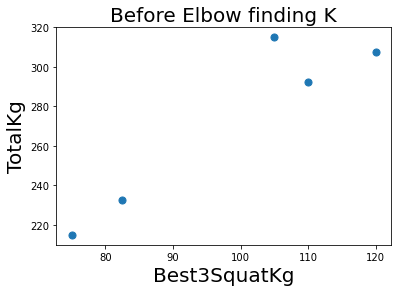

In [44]:
plt.scatter(X[:, 0], X[:, 1], s = 50)
# Adding title, xlabel, ylabel 
plt.title('Before Elbow finding K',fontsize=20)
plt.xlabel('Best3SquatKg',fontsize=20)
plt.ylabel('TotalKg',fontsize=20)
plt.show()

Your notebook must show and answer the following:

1. What is the optimal  𝑘  according the silhouette score?

In [56]:
k=2
km2 = KMeans(n_clusters=k)
km2.fit(X)

silhouette_score(X, km2.labels_, metric='euclidean')

0.7787838397377133

2. What else is interesting about the scores?

I am unable to understand the reason for this. Here is the code, that I am using to cluster and calculate silhouette score

## § CLUSTER INTERPRETATION

In [59]:
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

In [60]:
file_list_2019 = glob.glob("./data/**/19*/entries.csv")
df = pd.concat((pd.read_csv(file) for file in file_list_2019),ignore_index=True).head()

In [61]:
df.columns

Index(['Name', 'BirthDate', 'Team', 'Sex', 'Age', 'Division', 'Event',
       'Equipment', 'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg',
       'Squat3Kg', 'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg',
       'Bench3Kg', 'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg',
       'Deadlift3Kg', 'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place',
       'Tested', 'State', 'Country', 'BirthYear', 'CyrillicName',
       'ChineseName'],
      dtype='object')

In [62]:
# `Best3SquatKg`  = 14 index
# `TotalKg` = 25 index
X = df.iloc[:, [14, 25]].values

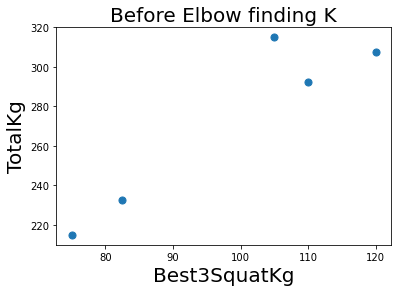

In [63]:
plt.scatter(X[:, 0], X[:, 1], s = 50)
# Adding title, xlabel, ylabel 
plt.title('Before Elbow finding K',fontsize=20)
plt.xlabel('Best3SquatKg',fontsize=20)
plt.ylabel('TotalKg',fontsize=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


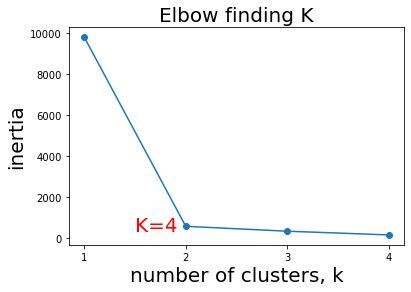

In [69]:
from sklearn.cluster import KMeans
#How we evaluate the quality of this clustering
ks = range(1, 5)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to samples
    model.fit(X)
    # Append the inertia to the list of inertias
    #inertia_ : Sum of squared distances of samples to their closest cluster center.  
    inertias.append(model.inertia_)
plt.figure()
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.title('Elbow finding K',fontsize=20)
plt.xlabel('number of clusters, k',fontsize=20)
plt.ylabel('inertia',fontsize=20)
plt.text(1.5,inertias[3]+200,'K=4',color='red',fontsize=20)
plt.xticks(ks)
plt.show()

In [70]:
THE_OPTIMAL_SILH_K=2
YOUR_OPENPOWERLIFTING_DATAFRAME_WITH_DUMMY_VARS=X

In [71]:
optimal_k = THE_OPTIMAL_SILH_K

km = KMeans(n_clusters=optimal_k, n_init=150)
km = km.fit(YOUR_OPENPOWERLIFTING_DATAFRAME_WITH_DUMMY_VARS)

for i in range(0, optimal_k):
    l = list(zip(YOUR_OPENPOWERLIFTING_DATAFRAME_WITH_DUMMY_VARS, km.cluster_centers_[i]))
    l.sort(key=lambda x: x[1], reverse=True)

    print('CLUSTER : {}\n'.format(i))
    for attr, val in l[:]:
      print('\t{} : {}\n'.format(attr, val))

CLUSTER : 0

	[120.  307.5] : 305.0

	[ 82.5 232.5] : 111.66666666666667

CLUSTER : 1

	[120.  307.5] : 223.75

	[ 82.5 232.5] : 78.75



Your notebook must show and answer the following:

1. for each cluster, describe in real words what the cluster centers are telling
  you about the representative of that cluster.  For example, your answer might
  look like: "for cluster 1, the representative for that cluster is a 24.7 year
  old female, with an average `Best3SquatKg` of 121 and a `TotalKg` of 721",



Cluster 1, the representative for that cluster is a 24.7 year
old female, with an average `Best3SquatKg` of 121 and a `TotalKg` of 721

2. show the output of the cluster centers above.

In [72]:
print(km.cluster_centers_)

[[111.66666667 305.        ]
 [ 78.75       223.75      ]]


**NOTE**: The order of the features in `km.cluster_centers_` are the same order
as they exist in the DataFrame.